In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import folium
import mysql.connector
from mysql.connector import Error

In [2]:
# Function to retrieve data from MySQL
def retrieve_data_from_mysql(host, user, password, database, query):
    try:
        # Connect to the MySQL database
        connection = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )

        if connection.is_connected():
            # Create a cursor object
            cursor = connection.cursor()

            # Execute the SQL query
            cursor.execute(query)

            # Fetch all the rows returned by the query
            rows = cursor.fetchall()

            # Get the column names
            columns = [desc[0] for desc in cursor.description]

            # Create a DataFrame from the fetched rows
            df = pd.DataFrame(rows, columns=columns)

            # Close the cursor and connection
            cursor.close()
            connection.close()

            # Return the DataFrame
            return df

    except Error as e:
        print("Error while connecting to MySQL", e)


In [3]:
# 1-Understanding the Data of Categories Table

In [4]:
# Retrieve data from Categories Table
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Categories'

df_Categories = retrieve_data_from_mysql(host, user, password, database, query)
print(df_Categories.head())  # Print the first few rows of the DataFrame

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


In [5]:
df_Categories.shape

(71, 2)

In [6]:
df_Categories.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [7]:
print(df_Categories.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [8]:
boolean = df_Categories.duplicated().any()
print(boolean)

False


In [9]:
print(df_Categories.describe())

       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [10]:
df_Categories.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [11]:
df_Categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
df_Categories.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [13]:
# 2-Cleaning the Data Of Categories Table

In [14]:
print(df_Categories.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [15]:
df_Categories.rename(columns={'product_category_name':'product_category_name_Portuguese'},inplace=True)

In [16]:
df_Categories.columns

Index(['product_category_name_Portuguese', 'product_category_name_english'], dtype='object')

In [17]:
# 3-Exploratory Data Analysis of Categories Table

In [18]:
#Calculate total number of Categories
product_category_name = len(df_Categories)
print(f"Total Number of Categories: {product_category_name } Category")

Total Number of Categories: 71 Category


In [19]:
# analyze how many products are in each category:
category_counts = df_Categories['product_category_name_english'].value_counts()
print(category_counts)

product_category_name_english
health_beauty                1
food                         1
fashion_sport                1
fashion_underwear_beach      1
construction_tools_safety    1
                            ..
luggage_accessories          1
cool_stuff                   1
fashion_shoes                1
audio                        1
security_and_services        1
Name: count, Length: 71, dtype: int64


In [20]:
# 1-Understanding the Data of Customers Table

In [21]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Customers'
df_customers = retrieve_data_from_mysql(host, user, password, database, query)
print(df_customers.head())  # Print the first few rows of the DataFrame

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [22]:
df_customers.shape

(99441, 5)

In [23]:
print(df_customers.duplicated().sum())

0


In [24]:
unique_customers = df_customers['customer_unique_id'].nunique()
print(f"Total number of unique customers: {unique_customers}")

Total number of unique customers: 96096


In [25]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [26]:
print(df_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [27]:
# 2-Cleaning the Data of Customers Table

In [28]:
print(df_customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [29]:
# 3-Exploratory Data Analysis of Customers Table

In [30]:
Total_Number_Of_Customer = len(df_customers)
print(f"Total Number of Customers: {Total_Number_Of_Customer}")

Total Number of Customers: 99441


In [31]:
# Number of customers per state
state_counts = df_customers['customer_state'].value_counts()
print("Total customer in each state :")
print(state_counts)

Total customer in each state :
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


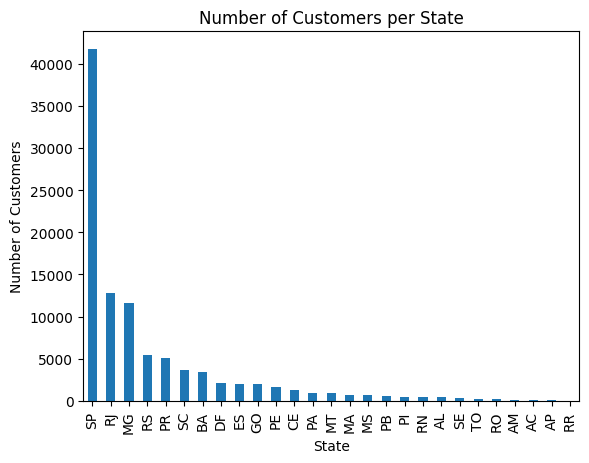

In [32]:
# Number of customers per state
df_customers['customer_state'].value_counts().plot(kind='bar')
plt.title('Number of Customers per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

In [33]:
# 1-Understanding the Data of Geolocation Table

In [34]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Geolocation'
df_Geolocation = retrieve_data_from_mysql(host, user, password, database, query)
print(df_Geolocation.head())  # Print the first few rows of the DataFrame

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037         -23.5456         -46.6393   
1                         1046         -23.5461         -46.6448   
2                         1046         -23.5461         -46.6430   
3                         1041         -23.5444         -46.6395   
4                         1035         -23.5416         -46.6416   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [35]:
df_Geolocation.shape

(1000163, 5)

In [36]:
df_Geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [37]:
print(df_Geolocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [38]:
print(df_Geolocation.describe())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660540e+01    -1.014670e+02
25%                   1.107500e+04    -2.360350e+01    -4.857315e+01
50%                   2.653000e+04    -2.291940e+01    -4.663790e+01
75%                   6.350400e+04    -1.997960e+01    -4.376770e+01
max                   9.999000e+04     4.506590e+01     1.211050e+02


In [39]:
# 2-Cleaning the Data of Geolocation Table

In [40]:
print(df_Geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [41]:
# 3-Exploratory Data Analysis of Geolocation Table

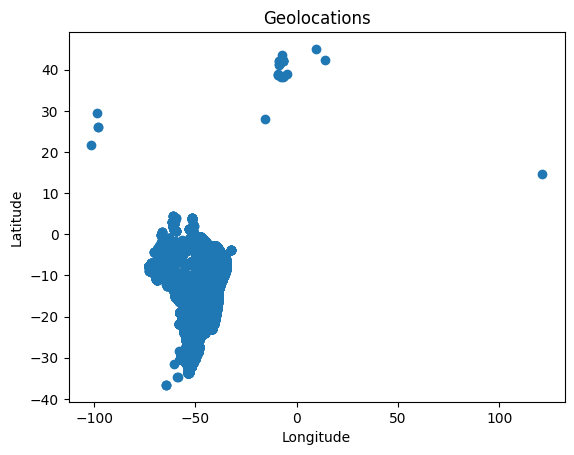

In [42]:
plt.scatter(df_Geolocation['geolocation_lng'], df_Geolocation['geolocation_lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocations')
plt.show()

In [43]:
# 1-Understanding the Data of Order Items Table

In [44]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Order_Items'
df_Order_Items = retrieve_data_from_mysql(host, user, password, database, query)
if df_Order_Items is not None:
    print(df_Order_Items.head())  # Print the first few rows of the DataFrame

                           order_id  order_item_id  \
0  7f39ba4c9052be115350065d07583cac              1   
1  9dc8d1a6f16f1b89874c29c9d8d30447              1   
2  d455a8cb295653b55abda06d434ab492              1   
3  006e43460a55bc60c0a437521e426529              1   
4  00dfb074b5c910fbd08e04691c4b712f              1   

                         product_id                         seller_id  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
1  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
2  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
3  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
4  4f3b83b83f7fb280fca4f90ba502f50e  001cca7ae9ae17fb1caed9dfb1094831   

  shipping_limit_date  price  freight_value  
0    10/24/2017 23:56  895.0          21.02  
1    10/18/2017 14:49  895.0          21.02  
2    10/12/2017 22:24  895.0          21.02  
3      5/17/2017 1:30   99.0          43.06  
4     

In [45]:
df_Order_Items.shape

(112650, 7)

In [46]:
df_Order_Items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [47]:
df_Order_Items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [48]:
print(df_Order_Items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [49]:
print(df_Order_Items.describe())

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000


In [50]:
# 2-Cleaning the Data of Order Items Table

In [51]:
df_Order_Items['shipping_limit_date'] = pd.to_datetime(df_Order_Items['shipping_limit_date'])

In [52]:
# 3-Exploratory Data Analysis of Order Items Table

In [53]:
# Analyze the top selling products
top_selling_products = df_Order_Items['product_id'].value_counts().head(10)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


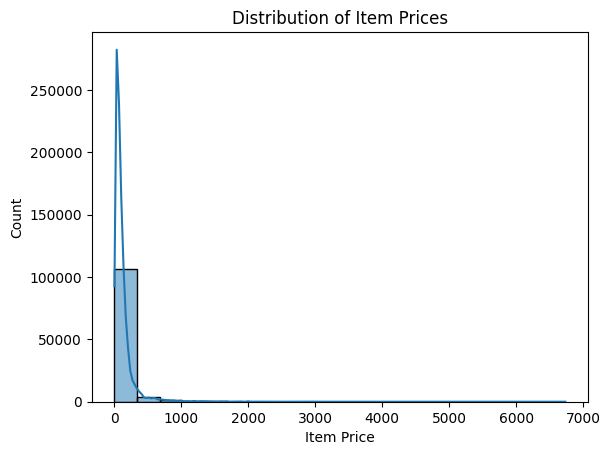

In [54]:
# Visualize the distribution of item prices
sns.histplot(df_Order_Items['price'], bins=20, kde=True)
plt.xlabel('Item Price')
plt.ylabel('Count')
plt.title('Distribution of Item Prices')
plt.show()

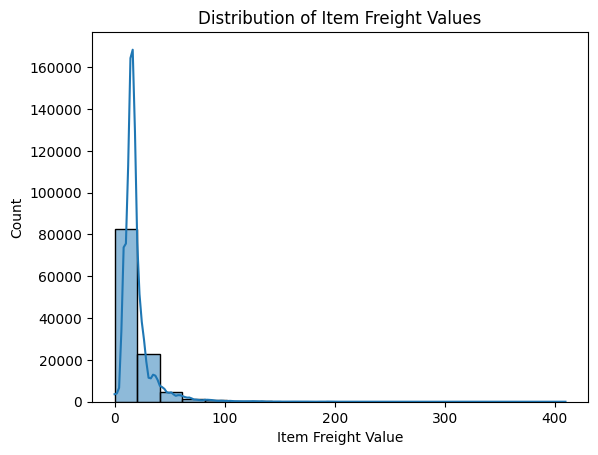

In [55]:
# Visualize the distribution of item freight values
sns.histplot(df_Order_Items['freight_value'], bins=20, kde=True)
plt.xlabel('Item Freight Value')
plt.ylabel('Count')
plt.title('Distribution of Item Freight Values')
plt.show()


In [56]:
# Analyze the top selling products
top_selling_products = df_Order_Items['product_id'].value_counts().head(10)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


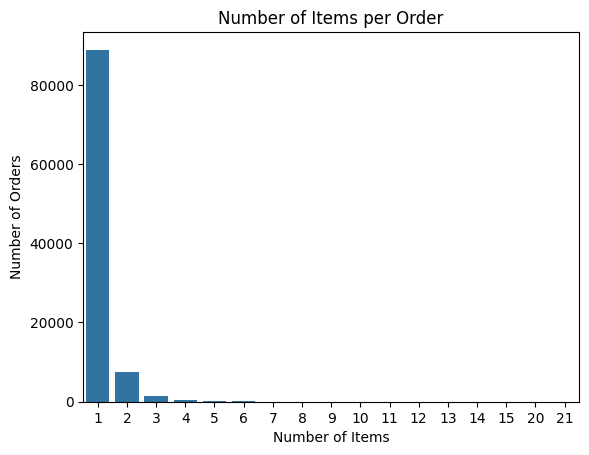

In [57]:
# Count the number of items in each order
items_per_order = df_Order_Items.groupby('order_id')['order_item_id'].max()

sns.countplot(x=items_per_order)
plt.title('Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

In [58]:
# Extract date features
df_Order_Items['shipping_limit_year'] = df_Order_Items['shipping_limit_date'].dt.year
df_Order_Items['shipping_limit_month'] = df_Order_Items['shipping_limit_date'].dt.month
df_Order_Items['shipping_limit_day'] = df_Order_Items['shipping_limit_date'].dt.day

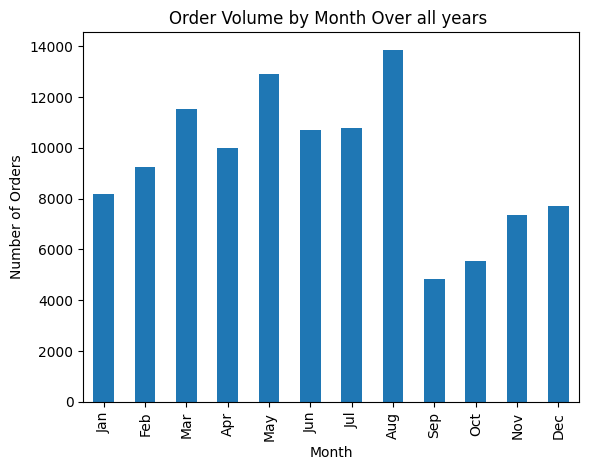

In [59]:
# Group by month
monthly_orders = df_Order_Items.groupby(df_Order_Items['shipping_limit_date'].dt.month).size()

monthly_orders.plot(kind='bar', title='Order Volume by Month Over all years ')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

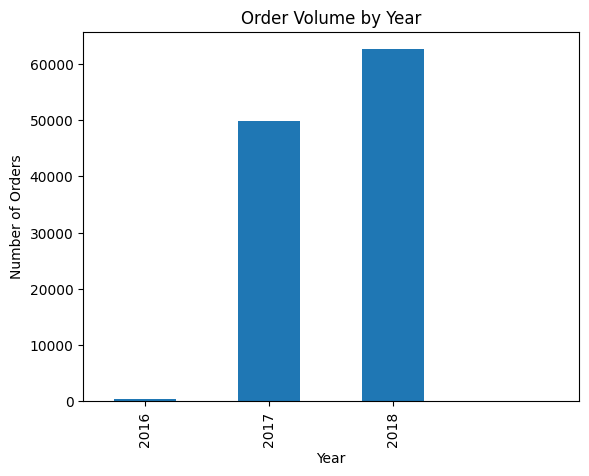

In [60]:
# Group by Year
yearly_orders = df_Order_Items.groupby(df_Order_Items['shipping_limit_date'].dt.year).size()

yearly_orders.plot(kind='bar', title='Order Volume by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(3), labels=['2016', '2017', '2018'])
plt.show()

Order Payments Table

In [61]:
# 1-Understanding the Data of Order Payments Table

In [62]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Order_Payments'
df_order_payment= retrieve_data_from_mysql(host, user, password, database, query)
if df_order_payment is not None:
    print(df_order_payment.head())  # Print the first few rows of the DataFrame

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [63]:
df_order_payment.shape

(103886, 5)

In [64]:
df_order_payment.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [65]:
df_order_payment.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [66]:
print(df_order_payment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [67]:
print(df_order_payment.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100381
std              0.706584              2.687051     217.494076
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.100000


In [68]:
df_order_payment.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [69]:
df_order_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [70]:
# 2-Cleaning the Data of Order Payments Table

In [71]:
print(df_order_payment.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [72]:
# 3-Exploratory Data Analysis of Order Payments Table

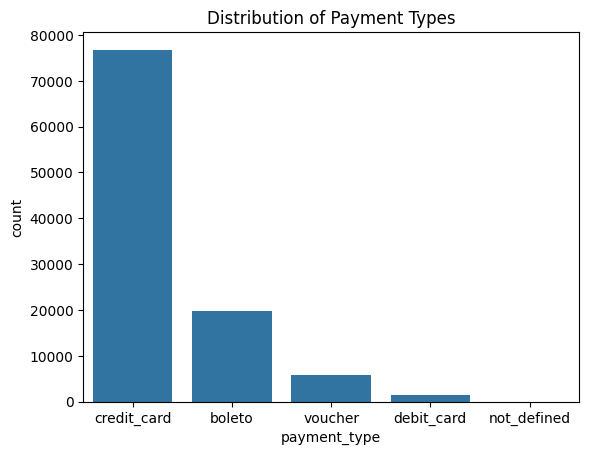

In [73]:
#Visualize the distribution of payment types:
sns.countplot(data=df_order_payment, x='payment_type')
plt.title('Distribution of Payment Types')
plt.show()

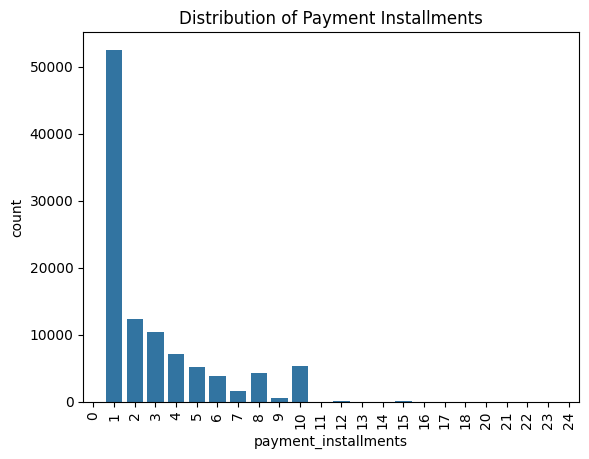

In [74]:
#Visualize the number of installments:
sns.countplot(data=df_order_payment, x='payment_installments')
plt.title('Distribution of Payment Installments')
plt.xticks(rotation=90)
plt.show()

In [75]:
# 1-Understanding the Data of Orders Table

In [76]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Orders'
df_orders = retrieve_data_from_mysql(host, user, password, database, query)
if df_orders is not None:
    print(df_orders.head())  # Print the first few rows of the DataFrame

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered          10/2/2017 10:56   10/2/2017 11:07   
1    delivered          7/24/2018 20:41    7/26/2018 3:24   
2    delivered            8/8/2018 8:38     8/8/2018 8:55   
3    delivered         11/18/2017 19:28  11/18/2017 19:45   
4    delivered          2/13/2018 21:18   2/13/2018 22:20   

  order_delivered_carrier_date order_delivered_customer_date  \
0              10/4/2017 19:55              10/10/2017 21:25   
1              7/26/2018 14:31                8/7/2018 15:27   
2 

In [77]:
df_orders.shape

(99441, 8)

In [78]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [79]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [80]:
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [81]:
print(df_orders.describe())

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp order_approved_at  \
count         99441                    99441             99281   
unique            8                    88789             50462   
top       delivered           8/2/2018 12:06   1/10/2018 10:32   
freq          96478                       28               109   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        61544                         75649   
top                  5/9/2018 15:48                2/1/2018 20:29   
fr

In [82]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         88789
order_approved_at                50462
order_delivered_carrier_date     61544
order_delivered_customer_date    75649
order_estimated_delivery_date      459
dtype: int64

In [83]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [84]:
# 2-Cleaning the Data of Orders Table

In [85]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [86]:
print(df_orders.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [87]:
# 3-Exploratory Data Analysis of Orders Table

In [88]:
df_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

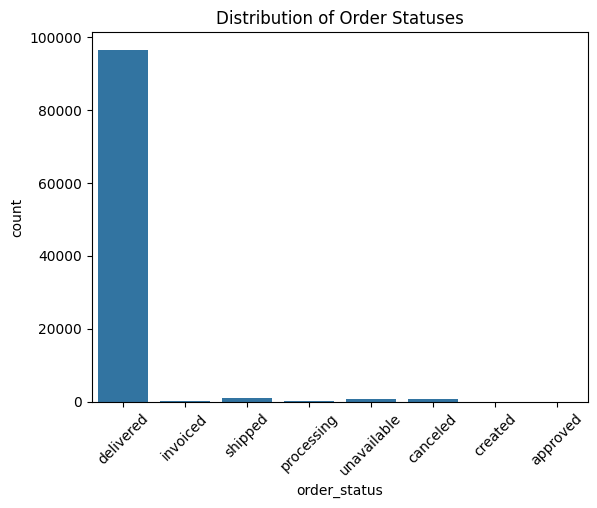

In [89]:
#Visualize the distribution of order statuses:
sns.countplot(data=df_orders, x='order_status')
plt.title('Distribution of Order Statuses')
plt.xticks(rotation=45)
plt.show()

Products Table

In [90]:
# 1-Understanding the Data of Products Table

In [91]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Products'
df_products = retrieve_data_from_mysql(host, user, password, database, query)
if df_products is not None:
    print(df_products.head())  # Print the first few rows of the DataFrame

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [92]:
df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [93]:
df_products.shape

(32951, 9)

In [94]:
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [95]:
df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [96]:
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [97]:
print(df_products.describe())

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.0

In [98]:
# 2-Cleaning the Data of Order Products Table

In [99]:
print(df_products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [100]:
df_products['product_category_name'] = df_products['product_category_name'].fillna('Unknown')

In [101]:
# 3-Exploratory Data Analysis of Orders Products Table

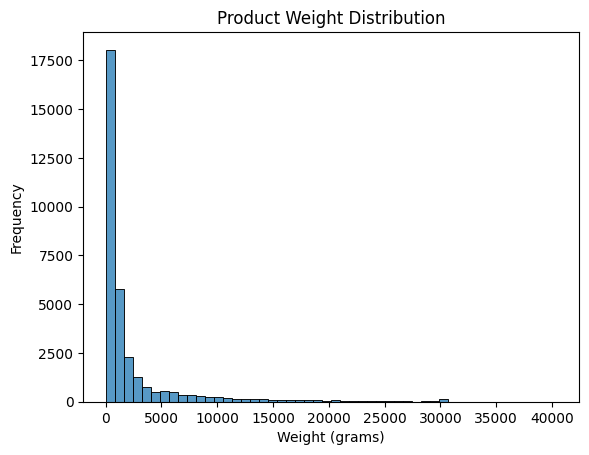

In [102]:

# Histogram for product weights
sns.histplot(df_products['product_weight_g'].dropna(), kde=False, bins=50)
plt.title('Product Weight Distribution')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()


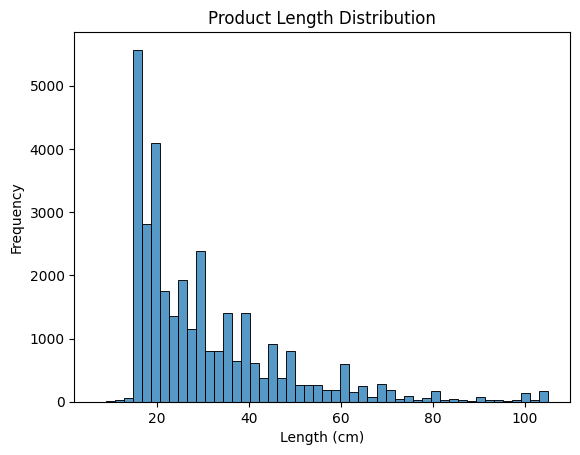

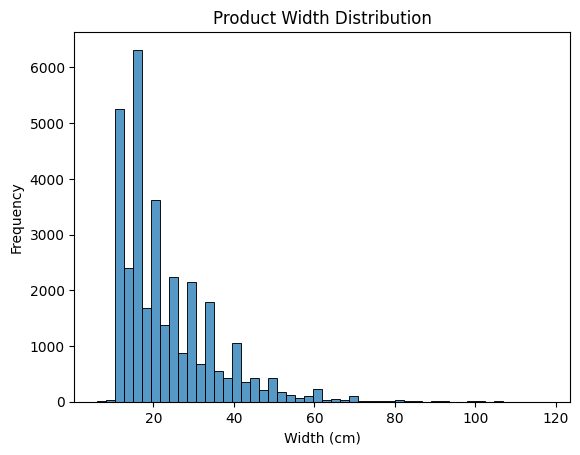

In [103]:
# Histogram for product dimensions
sns.histplot(df_products['product_length_cm'].dropna(), kde=False, bins=50)
plt.title('Product Length Distribution')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_products['product_width_cm'].dropna(), kde=False, bins=50)
plt.title('Product Width Distribution')
plt.xlabel('Width (cm)')
plt.ylabel('Frequency')
plt.show()


In [104]:
# Average weight, dimensions, and photos by category
category_analysis = df_products.groupby('product_category_name').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean',
    'product_photos_qty': 'mean'
}).sort_values(by='product_weight_g', ascending=False)

print(category_analysis)

                                                product_weight_g  \
product_category_name                                              
moveis_colchao_e_estofado                           13190.000000   
moveis_escritorio                                   12740.867314   
moveis_cozinha_area_de_servico_jantar_e_jardim      11598.563830   
moveis_quarto                                        9997.222222   
eletrodomesticos_2                                   9913.333333   
...                                                          ...   
tablets_impressao_imagem                              381.444444   
fashion_underwear_e_moda_praia                        362.264151   
fashion_esporte                                       344.736842   
fashion_roupa_infanto_juvenil                         324.000000   
telefonia                                             236.506173   

                                                product_length_cm  \
product_category_name                         

In [105]:
#Calculate the total number of products
total_number_of_products = df_products['product_id'].nunique()
print(f"The total number of unique products is: {total_number_of_products}")

The total number of unique products is: 32951


Reviews Table

In [106]:
# 1-Understanding the Data of Reviews Table

In [107]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Reviews'
df_review = retrieve_data_from_mysql(host, user, password, database, query)
if df_review is not None:
    print(df_review.head())  # Print the first few rows of the DataFrame

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                 None   
1             5                 None   
2             5                 None   
3             5                 None   
4             5                 None   

                              review_comment_message review_creation_date  \
0                                               None       1/18/2018 0:00   
1                                               None       3/10/2018 0:00   
2                                               None       2/17/2018 0:00   
3           

In [108]:
df_review.shape

(99224, 7)

In [109]:
df_review.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [110]:
df_review.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [111]:
print(df_review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [112]:
print(df_review.describe())

       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [113]:
# 2-Cleaning the Data of Reviews Table

In [114]:
df_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [115]:
# Convert dates to datetime format
df_review['review_creation_date'] = pd.to_datetime(df_review['review_creation_date'])
df_review['review_answer_timestamp'] = pd.to_datetime(df_review['review_answer_timestamp'])

In [116]:
print(df_review.dtypes)

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [117]:
# 3-Exploratory Data Analysis of Reviews Table

In [118]:
# Distribution of review scores
df_review['review_score'].value_counts().sort_index()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

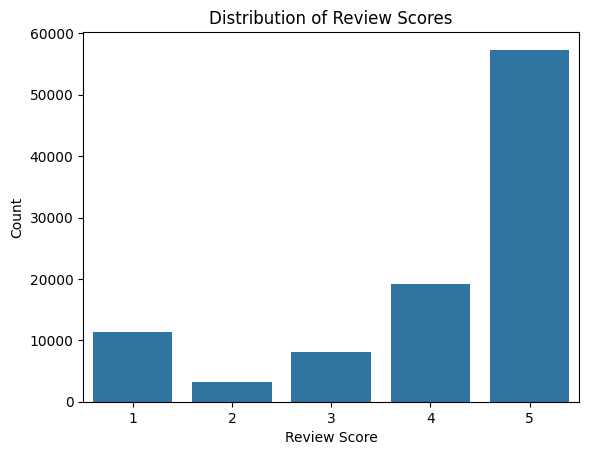

In [119]:
# Visualize the distribution of review scores
sns.countplot(x='review_score', data=df_review)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

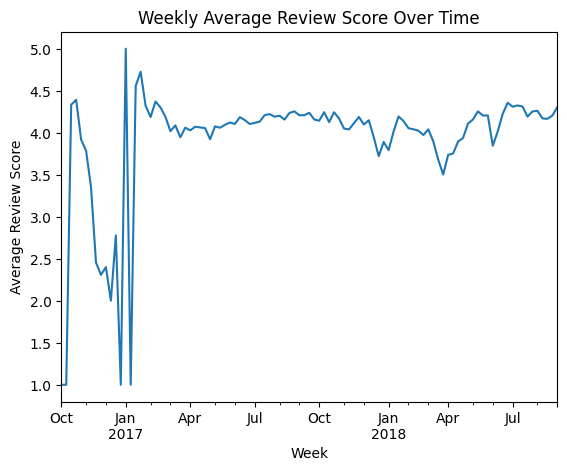

In [120]:
# Time between review sent and answer received
#df_review['response_time'] = (df_review['review_answer_timestamp'] - df_review['review_creation_date']).dt.total_seconds() / 3600.0

# Time series plot for reviews Score Over Time
df_review.set_index('review_creation_date')['review_score'].resample('W').mean().plot()
plt.title('Weekly Average Review Score Over Time')
plt.xlabel('Week')
plt.ylabel('Average Review Score')
plt.show()




In [121]:
# Calculate mean, median, mode
mean_score = df_review['review_score'].mean()
median_score = df_review['review_score'].median()
mode_score = df_review['review_score'].mode().values[0] 
# Display the numerical summaries
print(f"Mean Review Score: {mean_score:.2f}")
print(f"Median Review Score: {median_score:.2f}")
print(f"Mode Review Score: {mode_score}")

Mean Review Score: 4.09
Median Review Score: 5.00
Mode Review Score: 5


Sellers Table

In [122]:
# 1-Understanding the Data of Sellers Table

In [123]:
# retrieve Data
host = 'localhost'
user = 'root'
password = '1234'
database = 'dstask'
query = 'SELECT * FROM Sellers'
df_sellers = retrieve_data_from_mysql(host, user, password, database, query)
if df_sellers is not None:
    print(df_sellers.head())  # Print the first few rows of the DataFrame

                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


In [124]:
df_sellers.shape

(3095, 4)

In [125]:
df_sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [126]:
df_sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [127]:
print(df_sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [128]:
print(df_sellers.describe())

       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


In [129]:
# 2-Cleaning the Data of Sellers Table

In [130]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [131]:
df_sellers.duplicated().sum()

0

In [132]:
# Unique value counts for categorical columns
df_sellers['seller_state'].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

In [133]:
# 3-Exploratory Data Analysis of Sellers Table

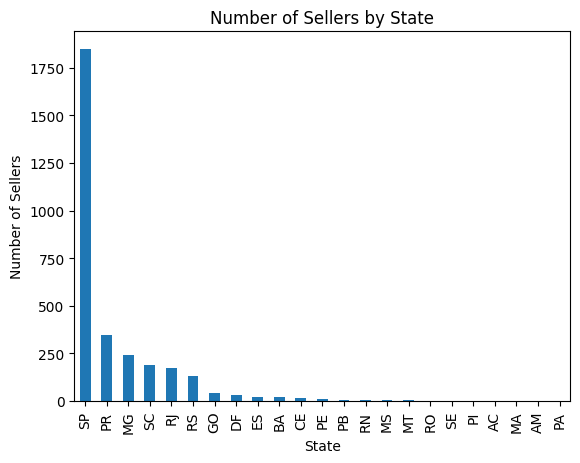

In [134]:
import matplotlib.pyplot as plt

# Count of sellers by state
df_sellers['seller_state'].value_counts().plot(kind='bar')
plt.title('Number of Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.show()


In [135]:
df_merged = pd.merge(df_Order_Items, df_sellers, on='seller_id', how='left')

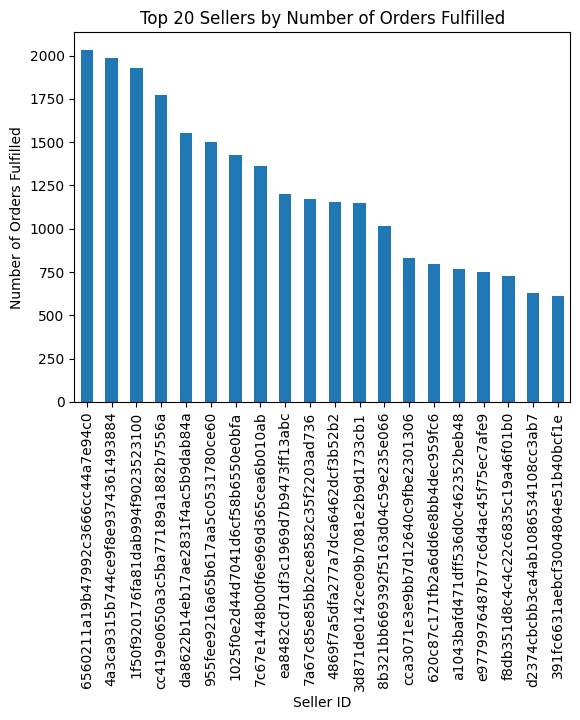

In [136]:
# Group by seller and count orders
seller_order_counts = df_merged.groupby('seller_id')['order_id'].count().sort_values(ascending=False)

# Seller order counts plot
seller_order_counts.head(20).plot(kind='bar')  # Displaying the top 20 sellers
plt.title('Top 20 Sellers by Number of Orders Fulfilled')
plt.xlabel('Seller ID')
plt.ylabel('Number of Orders Fulfilled')
plt.show()